# 02 - Análise Exploratória Básica

Neste notebook, busca-se realizar uma análise exploratória básica dos dados para auxiliar no treinamento dos modelos.

## Importações

In [41]:
import pickle
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

## Constantes e Sets

In [27]:
# PALETTE = 'balance'
BLUE = '#799FCB'
RED = '#F9665E'
YELLOW = '#FFEE8C'
GREEN = '#90CDC3'

pd.set_option('display.max_columns', None)

## Funções

In [3]:
def generate_colors(num_colors):
    colors = px.colors.sample_colorscale(PALETTE, [n/(num_colors - 1) for n in range(num_colors)])
    
    return colors

## Scripts

### Leitura

#### Base de dados

Como primeiro passo vamos realizar a leitura dos dados pré-tratados anteriormente.

In [10]:
df = pd.read_pickle('../data/processed/steel-plates-fault.pkl')
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,1687.0,1.0,0.0,80.0,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,1687.0,1.0,0.0,80.0,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,1623.0,1.0,0.0,100.0,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,1353.0,0.0,1.0,290.0,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,1353.0,0.0,1.0,185.0,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,221.0,242.0,3948212.0,3948253.0,519.0,33.0,41.0,48309.0,65.0,124.0,1360.0,1.0,0.0,200.0,0.3250,0.3972,0.5122,0.0154,0.6364,1.0000,1.0,2.7152,1.3222,1.6128,0.4878,-0.2728,0.9765,5
1264,1111.0,1121.0,4032298.0,4032320.0,110.0,20.0,22.0,12351.0,100.0,127.0,1354.0,1.0,0.0,200.0,0.3442,0.5000,0.4545,0.0074,0.5000,1.0000,1.0,2.0414,1.0000,1.3424,0.5454,-0.1228,0.3663,5
1265,995.0,1006.0,4085316.0,4085344.0,140.0,25.0,28.0,16076.0,103.0,132.0,1356.0,1.0,0.0,200.0,0.5162,0.5454,0.3929,0.0081,0.4400,1.0000,1.0,2.1461,1.0414,1.4472,0.6071,-0.1029,0.5096,5
1266,396.0,418.0,4116853.0,4116868.0,231.0,26.0,16.0,25096.0,56.0,141.0,1356.0,1.0,0.0,200.0,0.5841,0.3000,0.6818,0.0162,0.8461,0.9375,0.0,2.3636,1.3424,1.1761,-0.3182,-0.1512,0.5461,5


#### Mapa dos targets

Em seguida, iremos realizar a importação do mapa dos targets. Isto irá facilitar na leitura dos gráficos e validação do problema:

In [8]:
with open('../data/processed/target_maps.pkl', 'rb') as file: 
    targets_map = pickle.load(file)

targets_map

{0: 'Pastry',
 1: 'Z_Scratch',
 2: 'K_Scatch',
 3: 'Stains',
 4: 'Dirtiness',
 5: 'Bumps',
 6: 'Other_Faults'}

### Análise exploratória

#### Análise de proporção de classes

Como uma primeira análise, vamos verificar a proporção das classes. Para tal, vamos primeiro observar os valores numéricos e em seguida vamos trazer um gráfico de barras destes valores. Para facilitar, vamos substituir os ids das classes pelos seus valores.

In [12]:
df['Target'] = df['Target'].replace(targets_map)
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,1687.0,1.0,0.0,80.0,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,1687.0,1.0,0.0,80.0,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,1623.0,1.0,0.0,100.0,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,1353.0,0.0,1.0,290.0,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,1353.0,0.0,1.0,185.0,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,221.0,242.0,3948212.0,3948253.0,519.0,33.0,41.0,48309.0,65.0,124.0,1360.0,1.0,0.0,200.0,0.3250,0.3972,0.5122,0.0154,0.6364,1.0000,1.0,2.7152,1.3222,1.6128,0.4878,-0.2728,0.9765,Bumps
1264,1111.0,1121.0,4032298.0,4032320.0,110.0,20.0,22.0,12351.0,100.0,127.0,1354.0,1.0,0.0,200.0,0.3442,0.5000,0.4545,0.0074,0.5000,1.0000,1.0,2.0414,1.0000,1.3424,0.5454,-0.1228,0.3663,Bumps
1265,995.0,1006.0,4085316.0,4085344.0,140.0,25.0,28.0,16076.0,103.0,132.0,1356.0,1.0,0.0,200.0,0.5162,0.5454,0.3929,0.0081,0.4400,1.0000,1.0,2.1461,1.0414,1.4472,0.6071,-0.1029,0.5096,Bumps
1266,396.0,418.0,4116853.0,4116868.0,231.0,26.0,16.0,25096.0,56.0,141.0,1356.0,1.0,0.0,200.0,0.5841,0.3000,0.6818,0.0162,0.8461,0.9375,0.0,2.3636,1.3424,1.1761,-0.3182,-0.1512,0.5461,Bumps


In [22]:
target_prop = df['Target'].value_counts(ascending=True, normalize=True)
target_prop

Target
Dirtiness    0.043375
Stains       0.056782
Pastry       0.124606
Z_Scratch    0.149842
K_Scatch     0.308360
Bumps        0.317035
Name: proportion, dtype: float64

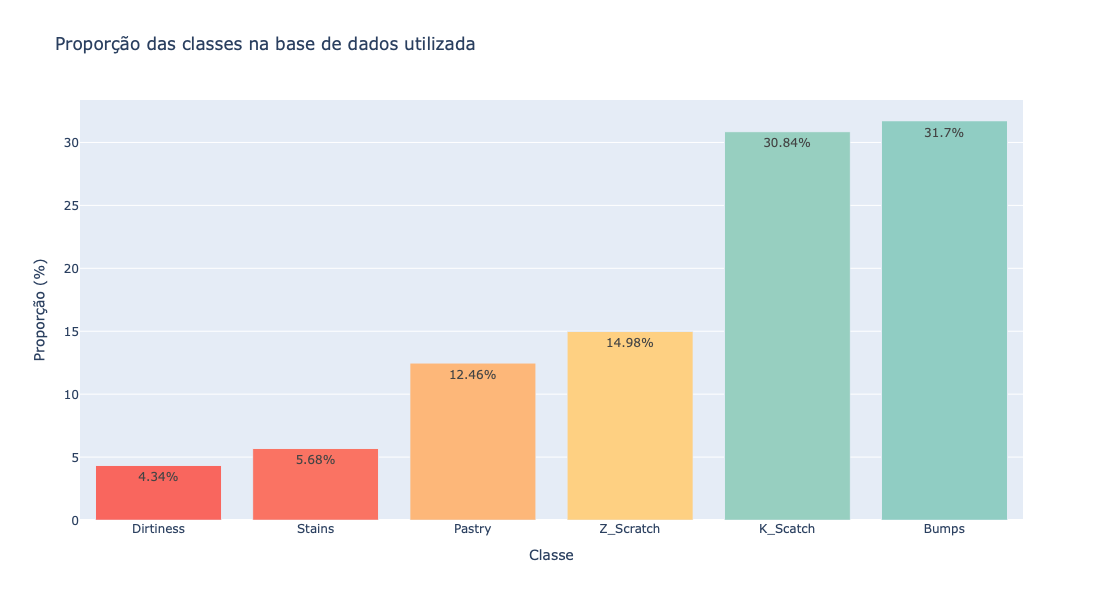

In [38]:
x_fig1 = target_prop.index
y_fig1 = target_prop.values * 100

fig1 = go.Figure()
fig1.add_trace(go.Bar(x=x_fig1, y=y_fig1, text=[f'{np.round(yy, 2)}%' for yy in y_fig1],
                      marker=dict(color=y_fig1, colorscale=[[0, RED], [0.5, YELLOW], [1, GREEN]])))
fig1.update_layout(title='Proporção das classes na base de dados utilizada', yaxis_title='Proporção (%)', xaxis_title='Classe',
                   height=600)
fig1.show()

#### Análise de similaridade das classes

Outra análise passível de ser realizada é a de similaridade entre as classes. Para tal, pode-se calcular os centroides das classes com base no valor médio de cada variável que descreve cada uma das classes e identificar a similaridade cosseno e a similaridade de acordo com a distância entre os centroides. Antes de mais nada vamos encontrar os centroides:

In [54]:
df_centroids = df.groupby('Target').mean()
df_centroids

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
Target,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bumps,796.532338,814.305970,2.088487e+06,2.088506e+06,238.465174,29.251244,23.743781,26102.781095,89.495025,128.455224,1522.935323,0.694030,0.305970,76.930348,0.467730,0.367982,0.709359,0.011940,0.698795,0.918521,0.618159,2.142860,1.148503,1.206135,0.096626,-0.150146,0.439279
Dirtiness,887.927273,899.163636,2.318304e+06,2.318361e+06,363.490909,45.163636,57.854545,40545.054545,102.000000,132.618182,1414.636364,0.163636,0.836364,84.454545,0.513347,0.404147,0.230593,0.007782,0.353331,0.946320,0.872727,2.333762,0.995764,1.569024,0.595342,-0.091856,0.584502
K_Scatch,136.593350,285.061381,1.649200e+06,1.649336e+06,7622.654731,384.657289,255.350384,835433.601023,55.061381,137.109974,1384.028133,0.002558,0.997442,40.179028,0.130249,0.457020,0.602695,0.107461,0.551673,0.526990,0.306905,3.598768,2.041123,1.839050,-0.300248,-0.102149,0.915748
Pastry,807.132911,818.202532,1.868146e+06,1.868203e+06,561.620253,35.563291,57.734177,61262.835443,76.487342,126.506329,1554.430380,0.310127,0.689873,92.905063,0.301604,0.328925,0.349628,0.007207,0.510502,0.993987,0.971519,2.379714,1.015025,1.542325,0.637354,-0.185273,0.565559
Stains,766.708333,773.777778,1.048676e+06,1.048681e+06,19.916667,8.222222,5.319444,2486.125000,114.555556,138.805556,1358.388889,0.013889,0.986111,50.694444,0.584725,0.407042,0.705119,0.005214,0.894800,0.928431,0.138889,1.235842,0.814700,0.659965,-0.265499,-0.014368,0.148858
Z_Scratch,209.315789,228.042105,1.309620e+06,1.309661e+06,506.594737,56.473684,49.673684,51466.194737,89.415789,119.447368,1357.863158,0.905263,0.094737,74.578947,0.192789,0.468223,0.566207,0.013793,0.506208,0.876074,0.700000,2.311458,1.197666,1.398901,0.261904,-0.190733,0.565437


Para que seja possível computar as distâncias é necessário escalonar os dados, visto que as variáveis são de escalas diferentes. Com isso, vamos realizar esta etapa:

In [74]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df.drop(columns='Target'))

df_scaled = pd.DataFrame(scaled_data, columns=df.drop(columns='Target').columns)
df_scaled['Target'] = df['Target']
df_centroids_scaled = df_scaled.groupby('Target').mean()
df_centroids_scaled

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
Target,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bumps,0.560592,0.517943,0.191241,0.191213,-0.385004,-0.314840,-0.152646,-0.428064,0.315376,-0.110793,0.566027,0.593339,-0.593339,0.302367,0.519232,-0.309002,0.454978,-0.460023,0.420431,0.480752,0.115398,-0.523353,-0.449519,-0.535674,0.060297,-0.105827,-0.490385
Dirtiness,0.738556,0.694328,0.324952,0.324945,-0.364525,-0.270876,-0.087538,-0.404011,0.698816,0.139267,-0.223064,-0.487993,0.487993,0.511900,0.669771,-0.039044,-1.357639,-0.526953,-1.009955,0.596042,0.641328,-0.306395,-0.735120,0.239812,1.091303,0.317269,-0.074824
K_Scatch,-0.724440,-0.582141,-0.064344,-0.064301,0.824531,0.667095,0.289430,0.919804,-0.740462,0.409079,-0.446082,-0.816390,0.816390,-0.721081,-0.594466,0.355629,0.051144,1.077462,-0.188725,-1.143024,-0.527644,1.131279,1.219550,0.816852,-0.760169,0.242559,0.873049
Pastry,0.581234,0.526043,0.063043,0.063038,-0.332071,-0.297401,-0.087767,-0.369508,-0.083478,-0.227858,0.795507,-0.189338,0.189338,0.747230,-0.028990,-0.600548,-0.906970,-0.536206,-0.359193,0.793727,0.845429,-0.254170,-0.699103,0.182758,1.178156,-0.360799,-0.129030
Stains,0.502519,0.433702,-0.413739,-0.413769,-0.420802,-0.372940,-0.187813,-0.467395,1.083807,0.510929,-0.632895,-0.793288,0.793288,-0.428249,0.905320,-0.017439,0.438926,-0.568286,1.231985,0.521850,-0.874761,-1.554176,-1.073683,-1.702827,-0.688331,0.879718,-1.321435
Z_Scratch,-0.582835,-0.700661,-0.261917,-0.261928,-0.341084,-0.239628,-0.103153,-0.385823,0.312947,-0.651874,-0.636726,1.023988,-1.023988,0.236885,-0.388081,0.439250,-0.086997,-0.430204,-0.376972,0.304713,0.284478,-0.331742,-0.357591,-0.123738,0.401979,-0.400428,-0.129378


Assim, podemos calcular as similaridades por:

##### Similaridade Cosseno

In [88]:
# cos_sim = cosine_similarity(df_centroids_scaled) # Normalizado
cos_sim = cosine_similarity(df_centroids)  # Não-normalizado

df_cos_sim = pd.DataFrame(cos_sim, index=df_centroids_scaled.index, columns=df_centroids_scaled.index)
df_cos_sim

Target,Bumps,Dirtiness,K_Scatch,Pastry,Stains,Z_Scratch
Target,,,,,,
Bumps,1.000000,0.999994,0.944370,0.999897,0.999974,0.999821
Dirtiness,0.999994,1.000000,0.945525,0.999941,0.999943,0.999881
K_Scatch,0.944370,0.945525,1.000000,0.948991,0.941990,0.950431
Pastry,0.999897,0.999941,0.948991,1.000000,0.999769,0.999989
Stains,0.999974,0.999943,0.941990,0.999769,1.000000,0.999659
Z_Scratch,0.999821,0.999881,0.950431,0.999989,0.999659,1.000000


E podemos pegar qual é a classe mais similar de caso para caso:

In [97]:
df_cos_sim.apply(lambda s: df_cos_sim.columns[np.argmax(s[1:]) + 1], axis=1)

Target
Bumps        Dirtiness
Dirtiness    Dirtiness
K_Scatch      K_Scatch
Pastry          Pastry
Stains          Stains
Z_Scratch    Z_Scratch
dtype: object

##### Distâncias Euclidianas

In [101]:
euc_dist = euclidean_distances(df_centroids_scaled)  # Normalizado
# euc_dist = euclidean_distances(df_centroids)  # Não normalizado

df_euc_dist = pd.DataFrame(euc_dist, index=df_centroids_scaled.index, columns=df_centroids_scaled.index)
# df_euc_dist = df_euc_dist.apply(lambda s: s/sorted(s)[-1], axis=1)
df_euc_dist

Target,Bumps,Dirtiness,K_Scatch,Pastry,Stains,Z_Scratch
Target,,,,,,
Bumps,0.000000,3.344635,5.700845,2.696975,3.803578,2.872524
Dirtiness,3.344635,0.000000,5.841385,2.049326,4.885264,3.850959
K_Scatch,5.700845,5.841385,0.000000,5.823100,6.725370,5.246822
Pastry,2.696975,2.049326,5.823100,0.000000,5.194515,3.454914
Stains,3.803578,4.885264,6.725370,5.194515,0.000000,5.142821
Z_Scratch,2.872524,3.850959,5.246822,3.454914,5.142821,0.000000


In [102]:
df_euc_dist.apply(lambda s: df_euc_dist.columns[np.argmin(s[1:]) + 1], axis=1)  # Quanto menor mais similar

Target
Bumps           Pastry
Dirtiness    Dirtiness
K_Scatch      K_Scatch
Pastry          Pastry
Stains          Stains
Z_Scratch    Z_Scratch
dtype: object